<a href="https://colab.research.google.com/github/bb5892lh/Bennett_Lineralgebra/blob/main/another_copy_of_explore_impact_of_eigenvalues_for_non_square_matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Singular Value Decomposition:  Exploring Eigenvalues and Eigenvectors for non-square matrices

The eigenvalues $\lambda$ and eigenvectors $\vec{v}$ of a square matrix $M$ satisfy the relationship

$$  M  \vec{v} = \lambda \vec{v}$$

In this equation:
  
  * The eigenvectors $\vec{v}$ tell us the directions stretched by $M$;
  * The eigenvalues $\lambda$ tell us how much $M$ stretches those directions

Taken together, the stretching factors $\lambda$ and corresponding directions $\vec{v}$ completely characterize the transformation given by matrix $M$.

In this activity, we'll explore a similar impact for non-square matrices.

We're going to use fairly large non-square matrices.  In fact, we'll use pictures so that we can **see** the impact of the stretching factors and their corresponding directions.

In order to make this impact more noticeable, we're only going to use parts of the overall image.  Part of the lab is to determine what the overall image is - and when you can notice the overall image.  That is:

  1. Do you need all of the information contained in the matrix, or just some of it?
  2. What information should you use to get a sense of the image?
  3. What does the remaining unused information represent?

In [ ]:
#  Libraries that we'll need:
import numpy as np
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt

import requests
from io import BytesIO

# This is a helper script to convert a 4 channel image to a 3 channel image
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    print("we have 4 channels")


    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background


    #Make it grey-scale:
    #rgb[:,:,0] = 0.33 * (r * a + (1.0 - a) * R) + 0.33 * g * a + (1.0 - a) * G + 0.33 * (b * a + (1.0 - a) * B)
    #rgb[:,:,1] = 0.33 * (r * a + (1.0 - a) * R) + 0.33 * g * a + (1.0 - a) * G + 0.33 * (b * a + (1.0 - a) * B)
    #rgb[:,:,2] = 0.33 * (r * a + (1.0 - a) * R) + 0.33 * g * a + (1.0 - a) * G + 0.33 * (b * a + (1.0 - a) * B)
    #have the image be color:
    rgb[:,:,0] = r * a  + (1.0-a) * R
    rgb[:,:,1] = g * a + (1.0-a) * G
    rgb[:,:,2] = b * a + (1.0-a) * B

    return np.asarray( rgb, dtype='uint8' )

#This is a helper script to display the resulting image from sv1 to sv2
def svdn1n2( zeroBefore, zeroAfter, origImg) :
    copyImg = origImg.copy()

    r_image = copyImg[:, :, 0]
    g_image = copyImg[:, :, 1]
    b_image = copyImg[:, :, 2]
    #a_image = copyImg[:, :, 3]

    #plt.imshow(r_image, origin='upper')

    Ur, sr, Vhr = linalg.svd(r_image)
    Ur.shape, sr.shape, Vhr.shape
    Mr,Nr = r_image.shape
    Sigr = linalg.diagsvd(sr,Mr,Nr)

    Ug, sg, Vhg = linalg.svd(g_image)
    Ug.shape, sg.shape, Vhg.shape
    Mg,Ng = g_image.shape
    Sigg = linalg.diagsvd(sg,Mg,Ng)

    Ub, sb, Vhb = linalg.svd(b_image)
    Ub.shape, sb.shape, Vhb.shape
    Mb,Nb = b_image.shape
    Sigb = linalg.diagsvd(sb,Mb,Nb)

    #Ua, sa, Vha = linalg.svd(a_image)
    #Ua.shape, sa.shape, Vha.shape
    #Ma,Na = a_image.shape
    #Siga = linalg.diagsvd(sa,Ma,Na)



    # make a copy of the matrix holding the singular values:
    SSigr = Sigr.copy()
    SSigg = Sigg.copy()
    SSigb = Sigb.copy()
    #SSiga = Siga.copy()

    # Eliminate some of the singular values in the singular value matrix for color 0:
    zeroEnd = min(SSigr.shape) - 1

    for i in range(0,zeroBefore-1):
        SSigr[i][i] = 0
        SSigg[i][i] = 0
        SSigb[i][i] = 0
    #    SSiga[i][i] = 0

    for i in range(zeroAfter,zeroEnd):
        SSigr[i][i] = 0
        SSigg[i][i] = 0
        SSigb[i][i] = 0
    #    SSiga[i][i] = 0

    print("Singular values are ", SSigr.diagonal()[zeroBefore-1:zeroAfter])

    newImg = copyImg.copy();
    newImg.fill(255)
    newImg[:,:,0] = Ur.dot(SSigr.dot(Vhr))
    newImg[:,:,1] = Ug.dot(SSigg.dot(Vhg))
    newImg[:,:,2] = Ub.dot(SSigb.dot(Vhb))
    #keep this alpha so that the transparent parts show up white while working in colab:
    #newImg[:,:,3] = a_image
    #newImg[:,:,3] = Ua.dot(SSiga.dot(Vha))

    x = np.linspace(zeroBefore, zeroAfter, (zeroAfter-zeroBefore + 1))

    return(newImg, x, SSigr, SSigg, SSigb)




# The structure of images, as matrices


An image is essentially an $r \times c$ matrix with $r$ rows and $c$ columns.  Each entry in the matrix contains information about the color of the pixel.  In the RGBA format of .png files, this information is a 4-tuple

$$  [  R,  G,   B,  A ] $$

where each of $R$, $G$, $B$, and $A$ is a value between 0 and 255.

Play around with the impact of changing these values to determine what happens for each color:

In [ ]:
row = 50
col = 50
rgba = np.zeros( (row, col, 4), dtype='uint8' )
rgba[:] = [255, 0, 0, 255]

#Uncomment to look at rgba as content:
#rgba



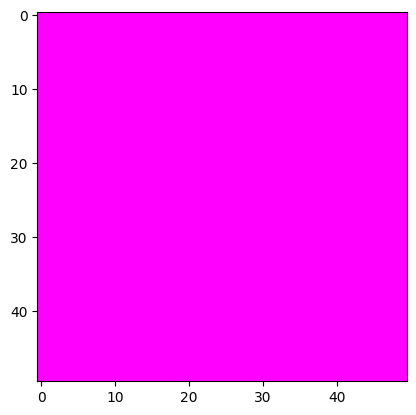

In [ ]:
#Adjust the entries in the 4-tuple:
rgba[:] = [255, 0, 255, 255]
#Look at rgba as an image:
plt.imshow(rgba, origin='upper')
plt.imshow(rgba, origin='upper')

#Questions:

1)  Identify these colors:

$[ 255, 0, 0, 255 ]$

$[ 0, 255, 0, 255 ]$

$[ 0, 0, 255, 255 ]$






2)  Vary $a$ between 0 and 255.  What happens to the color specified by $[ 255, 0, 0, a ]$ ?




3)  How do you think you would make purple or yellow?  Try it....






4)  Identify these colors:

$[ 255, 255, 0, 255 ]$

$[ 255, 0, 255, 255 ]$

$[ 0,  255, 255, 255 ]$

$[ 255, 255, 255, 255 ]$

# Grab the pre-created images for this activity

In [ ]:
#  Grab the picture to analyze from github and save it in our directory.
url1 = 'https://github.com/awangberg/Math311_Linear_algebra_code_projects/blob/master/image1_whitebg.png?raw=true'
image1Request = requests.get(url1)
image1 = Image.open(BytesIO(image1Request.content)).convert('RGB')
imageio.imwrite("sample_data/image1.png", np.array(image1))


url2 = 'https://github.com/awangberg/Math311_Linear_algebra_code_projects/blob/master/image2_whitebg.png?raw=true'
image2Request = requests.get(url2)
image2 = Image.open(BytesIO(image2Request.content)).convert('RGB')
imageio.imwrite("sample_data/image2.png", np.array(image2))

url3 = 'https://github.com/awangberg/Math311_Linear_algebra_code_projects/blob/master/image3_whitebg.png?raw=true'
image3Request = requests.get(url3)
image3 = Image.open(BytesIO(image3Request.content)).convert('RGB')
imageio.imwrite("sample_data/image3.png", np.array(image3))


##  Do the SVD on the image

Grab an image.  Note the number of singular values available:

In [ ]:
#Make this work for image1 first:

#Uncomment to specify the image we are using
#imagename = "image3"
imagename = "image1"
#imagename = "image2"

origImg = imageio.imread("sample_data/" + imagename + ".png")

print("the shape of ", imagename, " is ", origImg.shape)
print("the type of the image is ", origImg.dtype)
print("Number of Singular Values available are 1 -", min(origImg.shape[0], origImg.shape[1]))

the shape of  image1  is  (284, 260, 3)
the type of the image is  uint8
Number of Singular Values available are 1 - 260


<ipython-input-50-cdd04079c5fc>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  origImg = imageio.imread("sample_data/" + imagename + ".png")


## Make a plot using singular values from s_Start to s_end

Using the data above, set:
  * s_start = first singular value to use
  * s_end = last singular value to use
  * s_next = show impact of the next s_next singular values on a separate plot

Our goal is to determine the number of singular values we need to understand the picture.  
  *  In theory, we need *all* of them.
  *  In Practice, how many do we actually need?

Singular values are  [58791.137    6822.442    5589.653    5211.3384   3932.9526   3834.9204
  3609.7908   3413.2412   3311.1003   3161.374    2925.7458   2769.8496
  2574.2974   2444.8147   2408.5034   2326.0989   2184.1516   2173.7893
  2053.1926   1833.5271   1803.4187   1711.7012   1662.8389   1527.9991
  1470.5024   1463.6128   1419.7573   1314.49     1304.3092   1254.9833
  1174.7211   1159.6028   1084.4032   1014.57825   983.94434   965.27637
   941.4547    893.01      881.12274   857.20197   833.9696    777.885
   763.22095   713.46735   703.0616    646.5387    633.97296   606.2696
   591.17755   582.2751    580.46747   552.8207    519.61993   492.49014
   480.97437   466.2759    446.50824   427.16724   416.02835   402.37204
   393.86505   385.78128   380.28943   361.056     355.05655   341.121
   328.05383   317.136     305.74347   303.88736   291.4771    280.8686
   276.23914   271.08005   263.4801    262.78043   248.57755   245.00035
   232.66928   230.72699   226.6204    22

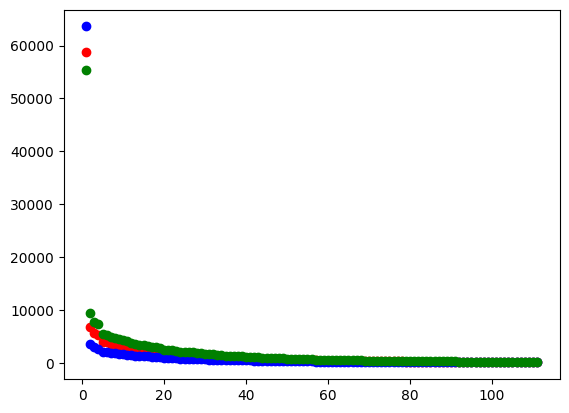

Can you recognize this image using Singular Values  1  to  111 ?


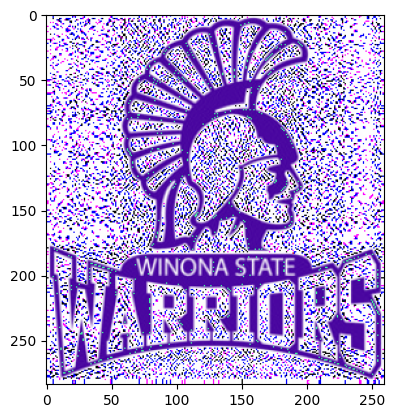

In [ ]:
#  Plot the images using s_start to s_end singular values:
#  Be sure to start with
s_start = 1
s_end = 111

#  We save the image, in case it is helpful for later.


#  Everything below here is done automatically:
s_next = s_end

result = svdn1n2(s_start, s_end, origImg)

img = result[0]
x = result[1]
redsigs = result[2]
greensigs = result[3]
bluesigs = result[4]

plt.cla()

plt.plot(x,redsigs.diagonal()[s_start-1:s_end], 'o', color='red');
plt.plot(x,bluesigs.diagonal()[s_start-1:s_end], 'o', color='blue');
plt.plot(x,greensigs.diagonal()[s_start-1:s_end], 'o', color='green');

plt.show()

print("Can you recognize this image using Singular Values ", s_start, " to ", s_end, "?")

imgwhite = img.copy()
imgwhite[:] = [255, 255, 255]
plt.imshow(imgwhite, origin='upper')
plt.imshow(img, origin='upper')

plt.show()

#save the image file where s_start and s_end refers to the
# singular values you're using for this image.
filename = imagename + '_s_' + str(s_start) + '_to_' + str(s_end) + '.png'
imageio.imwrite(filename, img)



#plt.cla()

#next = svdn1n2(s_end+1, (s_end + s_next), origImg)
#imgnext = next[0]
#nextx = next[1]
#nextredsigs = next[2]
#nextgreensigs = next[3]
#nextbluesigs = next[4]

#print("The next ", s_next , " Singular Values would add this to the image:")
#imgnextwhite = imgnext.copy()
#imgnextwhite[:] = [255, 255, 255]
#plt.imshow(imgnextwhite, origin='upper')
#plt.imshow(imgnext, origin='upper')
#
#plt.show()
#filename = imagename + '_s_' + str(s_start) + '_to_' + str(s_end) + '_next_' + str(s_next) + '_sing_values.png'
#imageio.imwrite(filename, imgnext) #create the image file where nnn refers to the singular values you're using for this image.




# Questions:

Answer these questions for each of image1, image2, and image3

## Image 1:

  a)  What was the size of the image (rows and columns), and what was the maximum number of singular values for that image?

  b)  When could you first determine the image, in terms of the number of singular values?   
  
  c)  What was it?

## Image 2:

  a)  What was the size of the image (rows and columns), and what was the maximum number of singular values for that image?

  b)  When could you first determine the image, in terms of the number of singular values?   
  
  c)  What was it?

## Image 3:

  a)  What was the size of the image (rows and columns), and what was the maximum number of singular values for that image?

  b)  When could you first determine the image, in terms of the number of singular values?   
  
  c)  What was it?

## Overall Questions:


d)  Which singular values had the biggest impact on the image?



e)  What was the overall effect of including more singular values in the image?



